# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error



filename = "/Users/Stav/github-repos/Stav-Grossfeld-DSI/week-03/1.4-linear-regression-lab/assets/datasets/Sacramentorealestatetransactions.csv"
house = pd.read_csv(filename)

house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [5]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
house = house[house['sq__ft'] > 0]
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

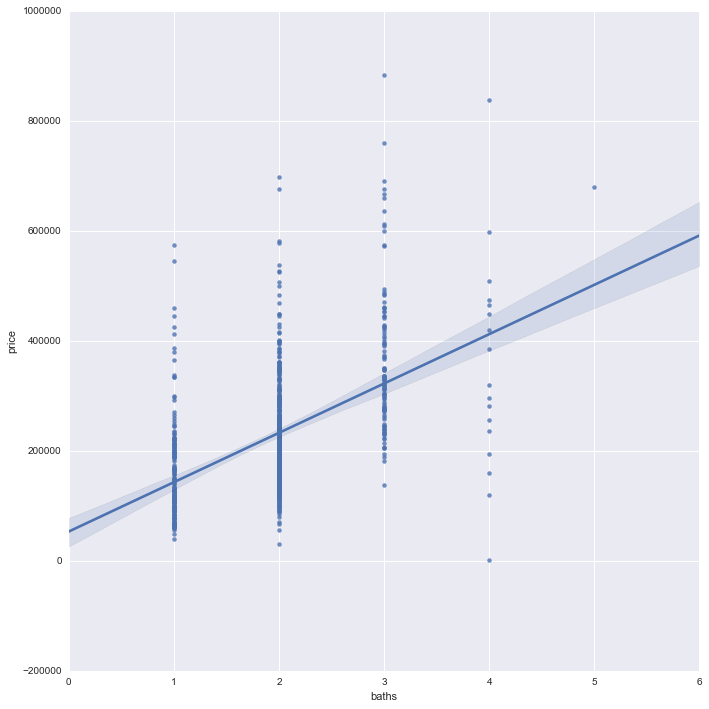

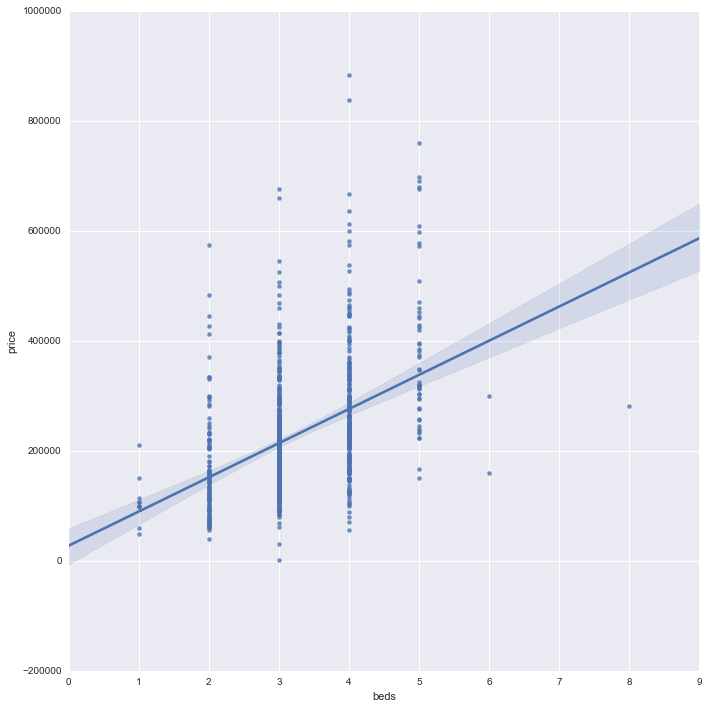

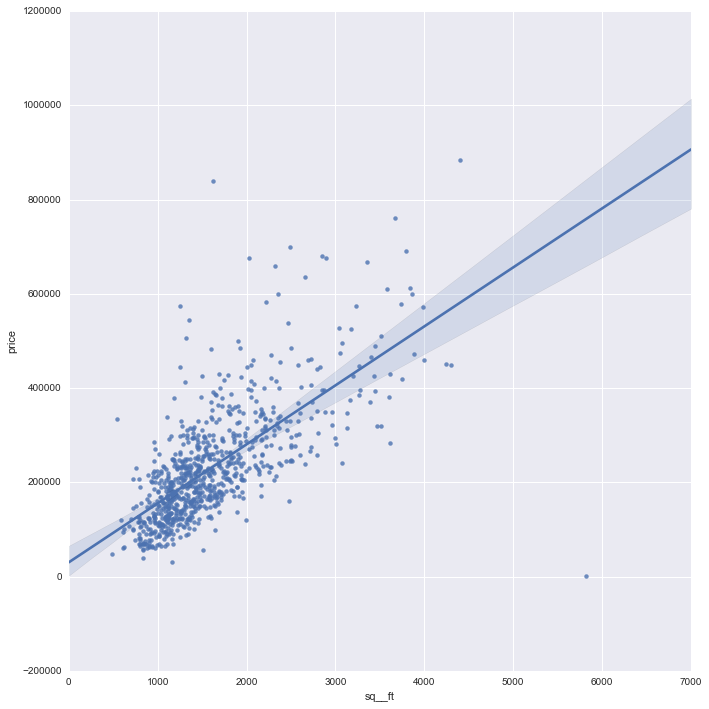

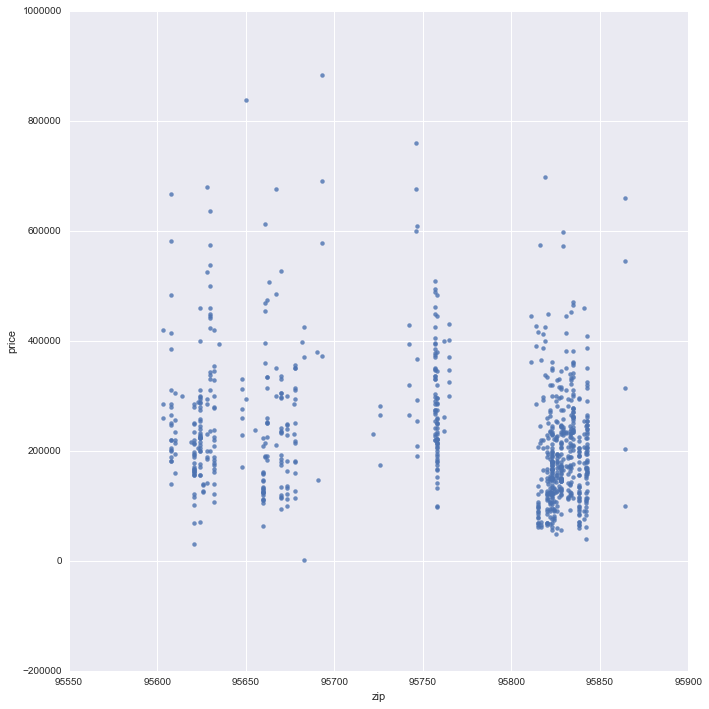

In [7]:
sns.lmplot('baths', 'price', house, size = 10)
sns.lmplot('beds','price',house, size = 10)
sns.lmplot('sq__ft', 'price',house, size = 10)
sns.lmplot('zip','price', house, fit_reg = False, size = 10)

In [8]:
print house['type']
print house['price']
house.dtypes

0      Residential
1      Residential
2      Residential
3      Residential
4      Residential
5            Condo
6      Residential
7      Residential
8            Condo
9      Residential
10     Residential
11     Residential
12     Residential
13     Residential
14     Residential
15           Condo
16     Residential
17           Condo
18     Residential
19     Residential
20     Residential
21     Residential
22     Residential
23     Residential
24     Residential
25     Residential
26     Residential
27     Residential
28     Residential
29     Residential
          ...     
952    Residential
953    Residential
954    Residential
955    Residential
956    Residential
957    Residential
958    Residential
959    Residential
960    Residential
961    Residential
962    Residential
963    Residential
964    Residential
965    Residential
967    Residential
968    Residential
969    Residential
971    Residential
972    Residential
974    Residential
975    Residential
976    Resid

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

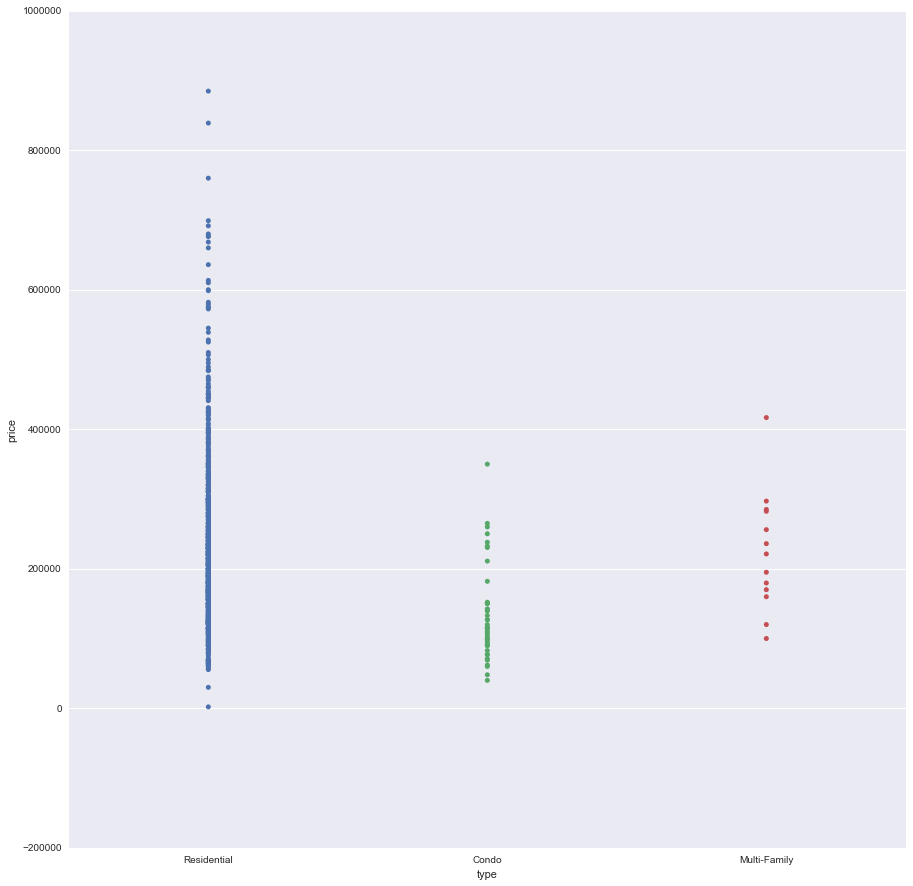

In [9]:
plt.figure(figsize=(15, 15))
sns.stripplot(x = house['type'], y = house.price, data = house, size = 5)


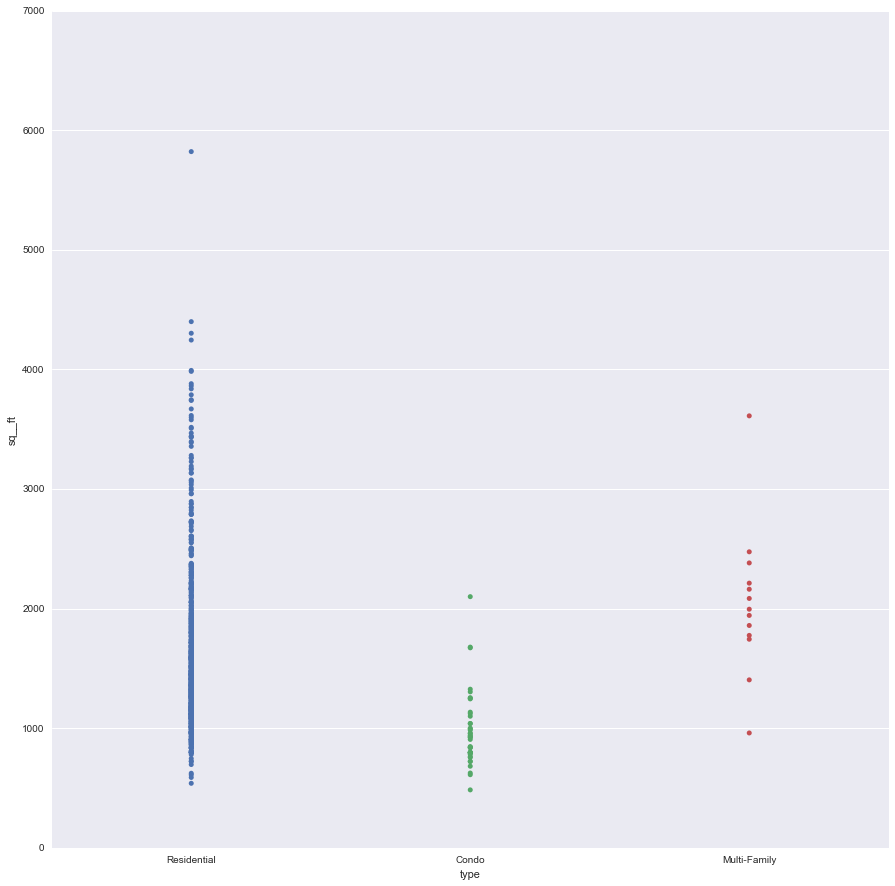

In [10]:
plt.figure(figsize=(15, 15))
sns.stripplot(x = house['type'], y = house.sq__ft, data = house, size = 5)

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [11]:
from sklearn import linear_model
import statsmodels.api as sm



In [22]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


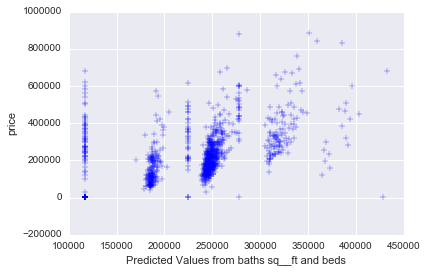

MSE: 15701615452.0


In [29]:
house.corr()
lm = linear_model.LinearRegression()
#baths, sq__ft, beds
x = house[['sq__ft','baths']]
y = house['price']


model = lm.fit(x, y)
predictions = model.predict(x)

# Plot the model
plt.scatter(predictions, y, s=30, c='blue', marker='+', zorder=10)
plt.xlabel("Predicted Values from baths sq__ft and beds")
plt.ylabel("price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [ ]:
These